In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

from tqdm import tqdm,tqdm_notebook

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,precision_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')


In [3]:
# import zipfile

# # Replace 'your_file.zip' with the actual file name
# file_name = '/content/drive/MyDrive/reviews_data.zip'

# # Extract the contents of the zip file
# wi th zipfile.ZipFile(file_name, 'r') as zip_ref:
#     zip_ref.extractall()

In [4]:
df=pd.read_csv("reviews_data_final.csv")

In [5]:
df

Unnamed: 0    ProductId          UserId  \
0                0   B004JGQ15E   AD3R2M2DT2BY3   
1                1   B002VZUW0A   AR3IY0Q7TT1WE   
2                2   B001FA1KJO   AC57A1QMUXK10   
3                3   B000EVOSE4  A3JYH4B3QTZJAY   
4                4   B000FA15OU  A3NEAETOSXDBOM   
...            ...          ...             ...   
568449      568449   B005NYXE24  A2IMI38VIVYZ3P   
568450      568450   B001E7653Y  A3FICOMPE2KFGY   
568451      568451   B007M83302  A1MOSL8Z26PB1C   
568452      568452   B004TPKAN4  A3EPJSPH03AS29   
568453      568453   B000EVG8J2  A369MUHEUOXGGX   

                                    ProfileName  HelpfulnessNumerator  \
0        Alexandra Cenni "Poisoned Rationality"                     1   
1                           Day "Chocolatestar"                     0   
2                               Pam Smith "Pam"                     1   
3                           Crux of Awesomeness                     5   
4                             Stephen M. Charme                     1   
...                                         ...                   ...   
568449          Mary Louise Carroll "mcarrroll"                     1   
568450                  C. Meyer "loves movies"                     0   
568451                              Earl Schube                     0   
568452                              pebblepuppy                     0   
568453                                   C. Gee                     1   

        HelpfulnessDenominator  Score        Time  \
0                            2      3  1303776000   
1                            0      5  1322265600   
2                            1      5  1326844800   
3                           18      1  1172102400   
4                            1      5  1299801600   
...                        ...    ...         ...   
568449                       1      1  1324425600   
568450                       0      1  1319328000   
568451                       0      5  1284336000   
568452                       0      4  1321574400   
568453                       1      5  1201824000   

                                            ReviewSummary  \
0                           Good Enough for a last resort   
1                                              MMMMMMMMM!   
2            Save money on K cups, use these bags instead   
3                                            Disappointed   
4                                       Delicious cookies   
...                                                   ...   
568449   I wish I would have read the reviews.  Totall...   
568450   Chocolate Chip Coconut Cookies not so yummy -...   
568451                  Fantastic tasting healthy or not!   
568452   Interesting mix of flavors.  LIke Newman's br...   
568453                    Gluten free, but NOT taste free   

                                                     text  
0        As far as snacks go, my family tends to enjoy...  
1        These are delicious....I just wish there was ...  
2        I use these when I just want a cup of coffee....  
3        I can't believe you guys jacked up the price ...  
4        My family has eaten these for years. They are...  
...                                                   ...  
568449   I was so excited when I purchased this produc...  
568450   I finally found my most favorite cookies thro...  
568451   These chips are great for snacking regarless ...  
568452   I like Newman's brand snacks and dressings so...  
568453   I got these for my daughter who has celiac.  ...  

[568454 rows x 10 columns]

In [6]:
df

Unnamed: 0    ProductId          UserId  \
0                0   B004JGQ15E   AD3R2M2DT2BY3   
1                1   B002VZUW0A   AR3IY0Q7TT1WE   
2                2   B001FA1KJO   AC57A1QMUXK10   
3                3   B000EVOSE4  A3JYH4B3QTZJAY   
4                4   B000FA15OU  A3NEAETOSXDBOM   
...            ...          ...             ...   
568449      568449   B005NYXE24  A2IMI38VIVYZ3P   
568450      568450   B001E7653Y  A3FICOMPE2KFGY   
568451      568451   B007M83302  A1MOSL8Z26PB1C   
568452      568452   B004TPKAN4  A3EPJSPH03AS29   
568453      568453   B000EVG8J2  A369MUHEUOXGGX   

                                    ProfileName  HelpfulnessNumerator  \
0        Alexandra Cenni "Poisoned Rationality"                     1   
1                           Day "Chocolatestar"                     0   
2                               Pam Smith "Pam"                     1   
3                           Crux of Awesomeness                     5   
4                             Stephen M. Charme                     1   
...                                         ...                   ...   
568449          Mary Louise Carroll "mcarrroll"                     1   
568450                  C. Meyer "loves movies"                     0   
568451                              Earl Schube                     0   
568452                              pebblepuppy                     0   
568453                                   C. Gee                     1   

        HelpfulnessDenominator  Score        Time  \
0                            2      3  1303776000   
1                            0      5  1322265600   
2                            1      5  1326844800   
3                           18      1  1172102400   
4                            1      5  1299801600   
...                        ...    ...         ...   
568449                       1      1  1324425600   
568450                       0      1  1319328000   
568451                       0      5  1284336000   
568452                       0      4  1321574400   
568453                       1      5  1201824000   

                                            ReviewSummary  \
0                           Good Enough for a last resort   
1                                              MMMMMMMMM!   
2            Save money on K cups, use these bags instead   
3                                            Disappointed   
4                                       Delicious cookies   
...                                                   ...   
568449   I wish I would have read the reviews.  Totall...   
568450   Chocolate Chip Coconut Cookies not so yummy -...   
568451                  Fantastic tasting healthy or not!   
568452   Interesting mix of flavors.  LIke Newman's br...   
568453                    Gluten free, but NOT taste free   

                                                     text  
0        As far as snacks go, my family tends to enjoy...  
1        These are delicious....I just wish there was ...  
2        I use these when I just want a cup of coffee....  
3        I can't believe you guys jacked up the price ...  
4        My family has eaten these for years. They are...  
...                                                   ...  
568449   I was so excited when I purchased this produc...  
568450   I finally found my most favorite cookies thro...  
568451   These chips are great for snacking regarless ...  
568452   I like Newman's brand snacks and dressings so...  
568453   I got these for my daughter who has celiac.  ...  

[568454 rows x 10 columns]

In [7]:
discrete_df = df.select_dtypes(include=['object'])

numerical_df = df.select_dtypes(include=['int64', 'float64'])

In [8]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("."*10, col_name, "."*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()

In [9]:

discrete_univariate_analysis(discrete_df)

.......... ProductId ..........
count                                                 568454
nunique                                                74258
unique     [ B004JGQ15E,  B002VZUW0A,  B001FA1KJO,  B000E...
Name: ProductId, dtype: object
Value Counts: 
 ProductId
 B007JFMH8M    913
 B002QWP89S    632
 B0026RQTGE    632
 B002QWHJOU    632
 B002QWP8H0    632
              ... 
 B006HY215A      1
 B000261P60      1
 B0047LUVV6      1
 B004GUXN4A      1
 B005HUW9TI      1
Name: count, Length: 74258, dtype: int64

.......... UserId ..........
count                                                 568454
nunique                                               256059
unique     [AD3R2M2DT2BY3, AR3IY0Q7TT1WE, AC57A1QMUXK10, ...
Name: UserId, dtype: object
Value Counts: 
 UserId
A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
                 ... 
A35TIRUAMX4J0N      1
A2LXUMI9NV5ELU      1
A3F9TJDT6A4YUK      1
A3NZA33L2UDQNS  

In [10]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std']))
        print()

In [11]:
numerical_univariate_analysis(numerical_df)

********** Unnamed: 0 **********
min            0.000000
max       568453.000000
mean      284226.500000
median    284226.500000
std       164098.679298
Name: Unnamed: 0, dtype: float64

********** HelpfulnessNumerator **********
min         0.000000
max       866.000000
mean        1.743817
median      0.000000
std         7.636513
Name: HelpfulnessNumerator, dtype: float64

********** HelpfulnessDenominator **********
min         0.00000
max       923.00000
mean        2.22881
median      1.00000
std         8.28974
Name: HelpfulnessDenominator, dtype: float64

********** Score **********
min       1.000000
max       5.000000
mean      4.183199
median    5.000000
std       1.310436
Name: Score, dtype: float64

********** Time **********
min       9.393408e+08
max       1.351210e+09
mean      1.296257e+09
median    1.311120e+09
std       4.804331e+07
Name: Time, dtype: float64



NOTE - Helpfulness (fraction of users who found the review helpful) = HelpfulnessNumerator / HelpfulnessDenominator

- **HelpfulnessNumerator**:
  - Counts users who found the review helpful.
  - Min: 0, Max: 866, Mean: 1.74.

- **HelpfulnessDenominator**:
  - Total users who voted on review helpfulness.
  - Min: 0, Max: 923, Mean: 2.23.

- **Score**:
  - Rating score given by users (1 to 5).
  - Mean: 4.18, indicating mostly positive reviews.

- **Time**:
  - Likely timestamp of review posting.
  - Wide range of posting times, mean approximately 1.3 billion seconds since the epoch.


In [12]:
df['Helpfulness'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']


In [13]:
df['Helpfulness'].value_counts()

Helpfulness
1.000000    183309
0.000000     33774
0.500000     21623
0.666667     10514
0.750000      6364
             ...  
0.535211         1
0.962791         1
0.342105         1
0.851064         1
0.987616         1
Name: count, Length: 951, dtype: int64

In [14]:
df['Helpfulness'].isna().sum()

270052

In [15]:
df.shape

(568454, 11)

In [16]:
df.columns

Index(['Unnamed: 0', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'ReviewSummary', 'text', 'Helpfulness'],
      dtype='object')

In [17]:
print(df["Score"].agg(['min', 'max', 'mean', 'median', 'std']))

min       1.000000
max       5.000000
mean      4.183199
median    5.000000
std       1.310436
Name: Score, dtype: float64


In [18]:
df.rename(columns={"Score":"rating"},inplace=True)

In [100]:
df['sentiment']=df['rating'].replace({1:"negative",0:"negative",4:"postive",5:"postive",3:"neural",2:"negative"})

Derivation based on the 'rating' column, mapping ratings to sentiment labels.

- Ratings 1 and 0 categorized as 'negative'.
- Ratings 4 and 5 categorized as 'positive'.
- Rating 3 categorized as 'neutral'.
- Rating 2 also categorized as 'negative'.

Facilitates easier sentiment analysis and visualization of sentiment distribution in the dataset.

In [21]:
df

Unnamed: 0    ProductId          UserId  \
0                0   B004JGQ15E   AD3R2M2DT2BY3   
1                1   B002VZUW0A   AR3IY0Q7TT1WE   
2                2   B001FA1KJO   AC57A1QMUXK10   
3                3   B000EVOSE4  A3JYH4B3QTZJAY   
4                4   B000FA15OU  A3NEAETOSXDBOM   
...            ...          ...             ...   
568449      568449   B005NYXE24  A2IMI38VIVYZ3P   
568450      568450   B001E7653Y  A3FICOMPE2KFGY   
568451      568451   B007M83302  A1MOSL8Z26PB1C   
568452      568452   B004TPKAN4  A3EPJSPH03AS29   
568453      568453   B000EVG8J2  A369MUHEUOXGGX   

                                    ProfileName  HelpfulnessNumerator  \
0        Alexandra Cenni "Poisoned Rationality"                     1   
1                           Day "Chocolatestar"                     0   
2                               Pam Smith "Pam"                     1   
3                           Crux of Awesomeness                     5   
4                             Stephen M. Charme                     1   
...                                         ...                   ...   
568449          Mary Louise Carroll "mcarrroll"                     1   
568450                  C. Meyer "loves movies"                     0   
568451                              Earl Schube                     0   
568452                              pebblepuppy                     0   
568453                                   C. Gee                     1   

        HelpfulnessDenominator  rating        Time  \
0                            2       3  1303776000   
1                            0       5  1322265600   
2                            1       5  1326844800   
3                           18       1  1172102400   
4                            1       5  1299801600   
...                        ...     ...         ...   
568449                       1       1  1324425600   
568450                       0       1  1319328000   
568451                       0       5  1284336000   
568452                       0       4  1321574400   
568453                       1       5  1201824000   

                                            ReviewSummary  \
0                           Good Enough for a last resort   
1                                              MMMMMMMMM!   
2            Save money on K cups, use these bags instead   
3                                            Disappointed   
4                                       Delicious cookies   
...                                                   ...   
568449   I wish I would have read the reviews.  Totall...   
568450   Chocolate Chip Coconut Cookies not so yummy -...   
568451                  Fantastic tasting healthy or not!   
568452   Interesting mix of flavors.  LIke Newman's br...   
568453                    Gluten free, but NOT taste free   

                                                     text  Helpfulness  \
0        As far as snacks go, my family tends to enjoy...     0.500000   
1        These are delicious....I just wish there was ...          NaN   
2        I use these when I just want a cup of coffee....     1.000000   
3        I can't believe you guys jacked up the price ...     0.277778   
4        My family has eaten these for years. They are...     1.000000   
...                                                   ...          ...   
568449   I was so excited when I purchased this produc...     1.000000   
568450   I finally found my most favorite cookies thro...          NaN   
568451   These chips are great for snacking regarless ...          NaN   
568452   I like Newman's brand snacks and dressings so...          NaN   
568453   I got these for my daughter who has celiac.  ...     1.000000   

       sentiment  
0         neural  
1        postive  
2        postive  
3       negative  
4        postive  
...          ...  
568449  negative  
568450  negative  
568451   postive  
568452   postive  
568453   postive  

[568454 rows x 12 

In [22]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [23]:
df.drop(columns=['rating'],inplace=True)

In [24]:
df.head()

ProductId          UserId                              ProfileName  \
0   B004JGQ15E   AD3R2M2DT2BY3   Alexandra Cenni "Poisoned Rationality"   
1   B002VZUW0A   AR3IY0Q7TT1WE                      Day "Chocolatestar"   
2   B001FA1KJO   AC57A1QMUXK10                          Pam Smith "Pam"   
3   B000EVOSE4  A3JYH4B3QTZJAY                      Crux of Awesomeness   
4   B000FA15OU  A3NEAETOSXDBOM                        Stephen M. Charme   

   HelpfulnessNumerator  HelpfulnessDenominator        Time  \
0                     1                       2  1303776000   
1                     0                       0  1322265600   
2                     1                       1  1326844800   
3                     5                      18  1172102400   
4                     1                       1  1299801600   

                                   ReviewSummary  \
0                  Good Enough for a last resort   
1                                     MMMMMMMMM!   
2   Save money on K cups, use these bags instead   
3                                   Disappointed   
4                              Delicious cookies   

                                                text  Helpfulness sentiment  
0   As far as snacks go, my family tends to enjoy...     0.500000    neural  
1   These are delicious....I just wish there was ...          NaN   postive  
2   I use these when I just want a cup of coffee....     1.000000   postive  
3   I can't believe you guys jacked up the price ...     0.277778  negative  
4   My family has eaten these for years. They are...     1.000000   postive

# Exploratory Data Analysis

In [99]:
df.sentiment.value_counts()

sentiment
postive     443777
negative     82037
neural       42640
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

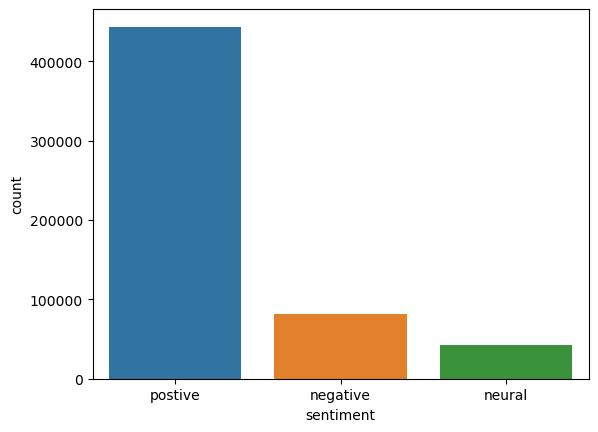

In [25]:
sns.countplot(x='sentiment',order=df['sentiment'].value_counts().index,data=df)

 - Positive Sentiment: 443,777 reviews are categorized as 'positive', indicating a predominant positive sentiment towards the products.

 -  Negative Sentiment: 82,037 reviews are categorized as 'negative', reflecting areas of dissatisfaction or criticism among customers.
 -  Neutral Sentiment: 42,640 reviews fall under the 'neutral' category, suggesting a lack of strong positive or negative opinions about the products.

In [26]:
df['Helpfulness'].isnull().sum()

270052

In [27]:
df['Helpfulness']

0         0.500000
1              NaN
2         1.000000
3         0.277778
4         1.000000
            ...   
568449    1.000000
568450         NaN
568451         NaN
568452         NaN
568453    1.000000
Name: Helpfulness, Length: 568454, dtype: float64

In [28]:
df.drop(columns=["ProfileName","Time","Helpfulness"],inplace=True)

In [29]:
df.drop(columns=['HelpfulnessNumerator','HelpfulnessDenominator'],inplace=True)

#  Data Preprocessing

In [30]:
df.head()

ProductId          UserId                                  ReviewSummary  \
0   B004JGQ15E   AD3R2M2DT2BY3                  Good Enough for a last resort   
1   B002VZUW0A   AR3IY0Q7TT1WE                                     MMMMMMMMM!   
2   B001FA1KJO   AC57A1QMUXK10   Save money on K cups, use these bags instead   
3   B000EVOSE4  A3JYH4B3QTZJAY                                   Disappointed   
4   B000FA15OU  A3NEAETOSXDBOM                              Delicious cookies   

                                                text sentiment  
0   As far as snacks go, my family tends to enjoy...    neural  
1   These are delicious....I just wish there was ...   postive  
2   I use these when I just want a cup of coffee....   postive  
3   I can't believe you guys jacked up the price ...  negative  
4   My family has eaten these for years. They are...   postive

In [31]:
X=df['text'] + " " +df["ReviewSummary"]
y=df[['sentiment']]

In [32]:
y

sentiment
0         neural
1        postive
2        postive
3       negative
4        postive
...          ...
568449  negative
568450  negative
568451   postive
568452   postive
568453   postive

[568454 rows x 1 columns]

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


In [34]:
print("Shape of Training data:",X_train.shape,y_train.shape)
print("Shape of Test data:",X_test.shape,y_test.shape)

Shape of Training data: (426340,) (426340, 1)
Shape of Test data: (142114,) (142114, 1)


In [35]:
def preprocess(raw_text,flag):
  sentence=re.sub("[^a-zA-Z.]"," ",raw_text)
  tokens=sentence.split()
  clean_tokens=[t for t in tokens if not t in stopwords.words("english")]

  if (flag=='stem'):
    clean_tokens=[stemmer.stem(word) for word in clean_tokens]
  else:
    clean_tokens=[lemmatizer.lemmatize(word) for word in clean_tokens]
    return pd.Series([" ".join(clean_tokens),len(clean_tokens)])

In [36]:
tqdm.pandas()

In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [39]:
X_train

229663     Medicine tablets and cats never ever mix. The...
131372     Great stuff to have in the kitchen.<br />Good...
205815     The shipping cost for these Necco Candy wafer...
398751     This arrived in a timely manner and is a grea...
376247     My dog was put on a hypoallergenic (duck and ...
                                ...                        
359783     Most GF pretzels, cookies, etc. that are tryi...
152315     My husband and I both love this.I buy it at W...
117952     My youngest cat (3 years) loves the Elegant M...
435829     I purchased this at the recommendation of Nao...
305711     This review will make me sound really stupid,...
Length: 426340, dtype: object

In [40]:
#  initilise the inbuild Stemmer  
stemmer = PorterStemmer()
lemmatizer=WordNetLemmatizer()

In [41]:
temp_df=X_train.progress_apply(lambda x: preprocess(x,'lemma'))

100%|████████████████████████████████████████████████████████████████████████| 426340/426340 [6:57:01<00:00, 17.04it/s]


In [42]:
temp_df

0    1
229663  Medicine tablet cat never ever mix. The vet ma...   98
131372  Great stuff kitchen. br Good delivery. Would b...   12
205815  The shipping cost Necco Candy wafer . almost c...   14
398751  This arrived timely manner great product. Love...   16
376247  My dog put hypoallergenic duck potato dog food...   69
...                                                   ...  ...
359783  Most GF pretzel cooky etc. trying substitute w...   35
152315  My husband I love this.I buy Walmart deffinate...   14
117952  My youngest cat year love Elegant Medleys Fanc...   33
435829  I purchased recommendation Naomi Most The Hard...   44
305711  This review make sound really stupid whatever....  502

[426340 rows x 2 columns]

In [43]:
temp_df.columns = ['clean_text', 'text_length']
temp_df.head()

clean_text  text_length
229663  Medicine tablet cat never ever mix. The vet ma...           98
131372  Great stuff kitchen. br Good delivery. Would b...           12
205815  The shipping cost Necco Candy wafer . almost c...           14
398751  This arrived timely manner great product. Love...           16
376247  My dog put hypoallergenic duck potato dog food...           69

In [44]:
X_train = pd.concat([X_train, temp_df], axis=1)

X_train.head()

0  \
229663   Medicine tablets and cats never ever mix. The...   
131372   Great stuff to have in the kitchen.<br />Good...   
205815   The shipping cost for these Necco Candy wafer...   
398751   This arrived in a timely manner and is a grea...   
376247   My dog was put on a hypoallergenic (duck and ...   

                                               clean_text  text_length  
229663  Medicine tablet cat never ever mix. The vet ma...           98  
131372  Great stuff kitchen. br Good delivery. Would b...           12  
205815  The shipping cost Necco Candy wafer . almost c...           14  
398751  This arrived timely manner great product. Love...           16  
376247  My dog put hypoallergenic duck potato dog food...           69

In [45]:
temp_x_text=X_test.progress_apply(lambda x: preprocess(x,'lemma'))

100%|████████████████████████████████████████████████████████████████████████| 142114/142114 [1:25:31<00:00, 27.69it/s]


In [46]:
temp_x_text

0    1
11214   Check one listed five star Dreamfields v grade...  186
222079  Tasters Choice best instant coffee ever. I wan...   44
251082  thing bothered bit packing. Some honey leaked ...   31
317731  One disgusting experience life Pulled package ...   75
404652  I ordered PureVia Natural Zero Calorie Sweeten...   27
...                                                   ...  ...
146313  I dissapointed Mate. It said cinnamon flavor h...   34
126633  My pup love food I love organic bulked useless...   24
555213  good value ordering bulk. tea arrived fine tas...   24
306433  We prepared curry paste chicken fish. It tasty...   27
181     I sitting drinking cup Teeccino Herbal etc. et...   56

[142114 rows x 2 columns]

In [47]:
temp_x_text.columns = ['clean_text', 'text_length']

temp_x_text.head()

clean_text  text_length
11214   Check one listed five star Dreamfields v grade...          186
222079  Tasters Choice best instant coffee ever. I wan...           44
251082  thing bothered bit packing. Some honey leaked ...           31
317731  One disgusting experience life Pulled package ...           75
404652  I ordered PureVia Natural Zero Calorie Sweeten...           27

In [48]:
X_test = pd.concat([X_test, temp_x_text], axis=1)

X_test.head()

0  \
11214    Check the ones who have listed five stars for...   
222079   Tasters Choice is the best instant coffee eve...   
251082   the only thing bothered me a bit is the packi...   
317731   One of the most disgusting experiences of my ...   
404652   I ordered the PureVia all Natural Zero Calori...   

                                               clean_text  text_length  
11214   Check one listed five star Dreamfields v grade...          186  
222079  Tasters Choice best instant coffee ever. I wan...           44  
251082  thing bothered bit packing. Some honey leaked ...           31  
317731  One disgusting experience life Pulled package ...           75  
404652  I ordered PureVia Natural Zero Calorie Sweeten...           27

In [49]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [50]:
positive_df = X_train.loc[y_train["sentiment"]=='postive', :]

words = ' '.join(positive_df['clean_text'])


In [51]:
cleaned_word = " ".join([word for word in words.split()
                        if 'br' not in word])

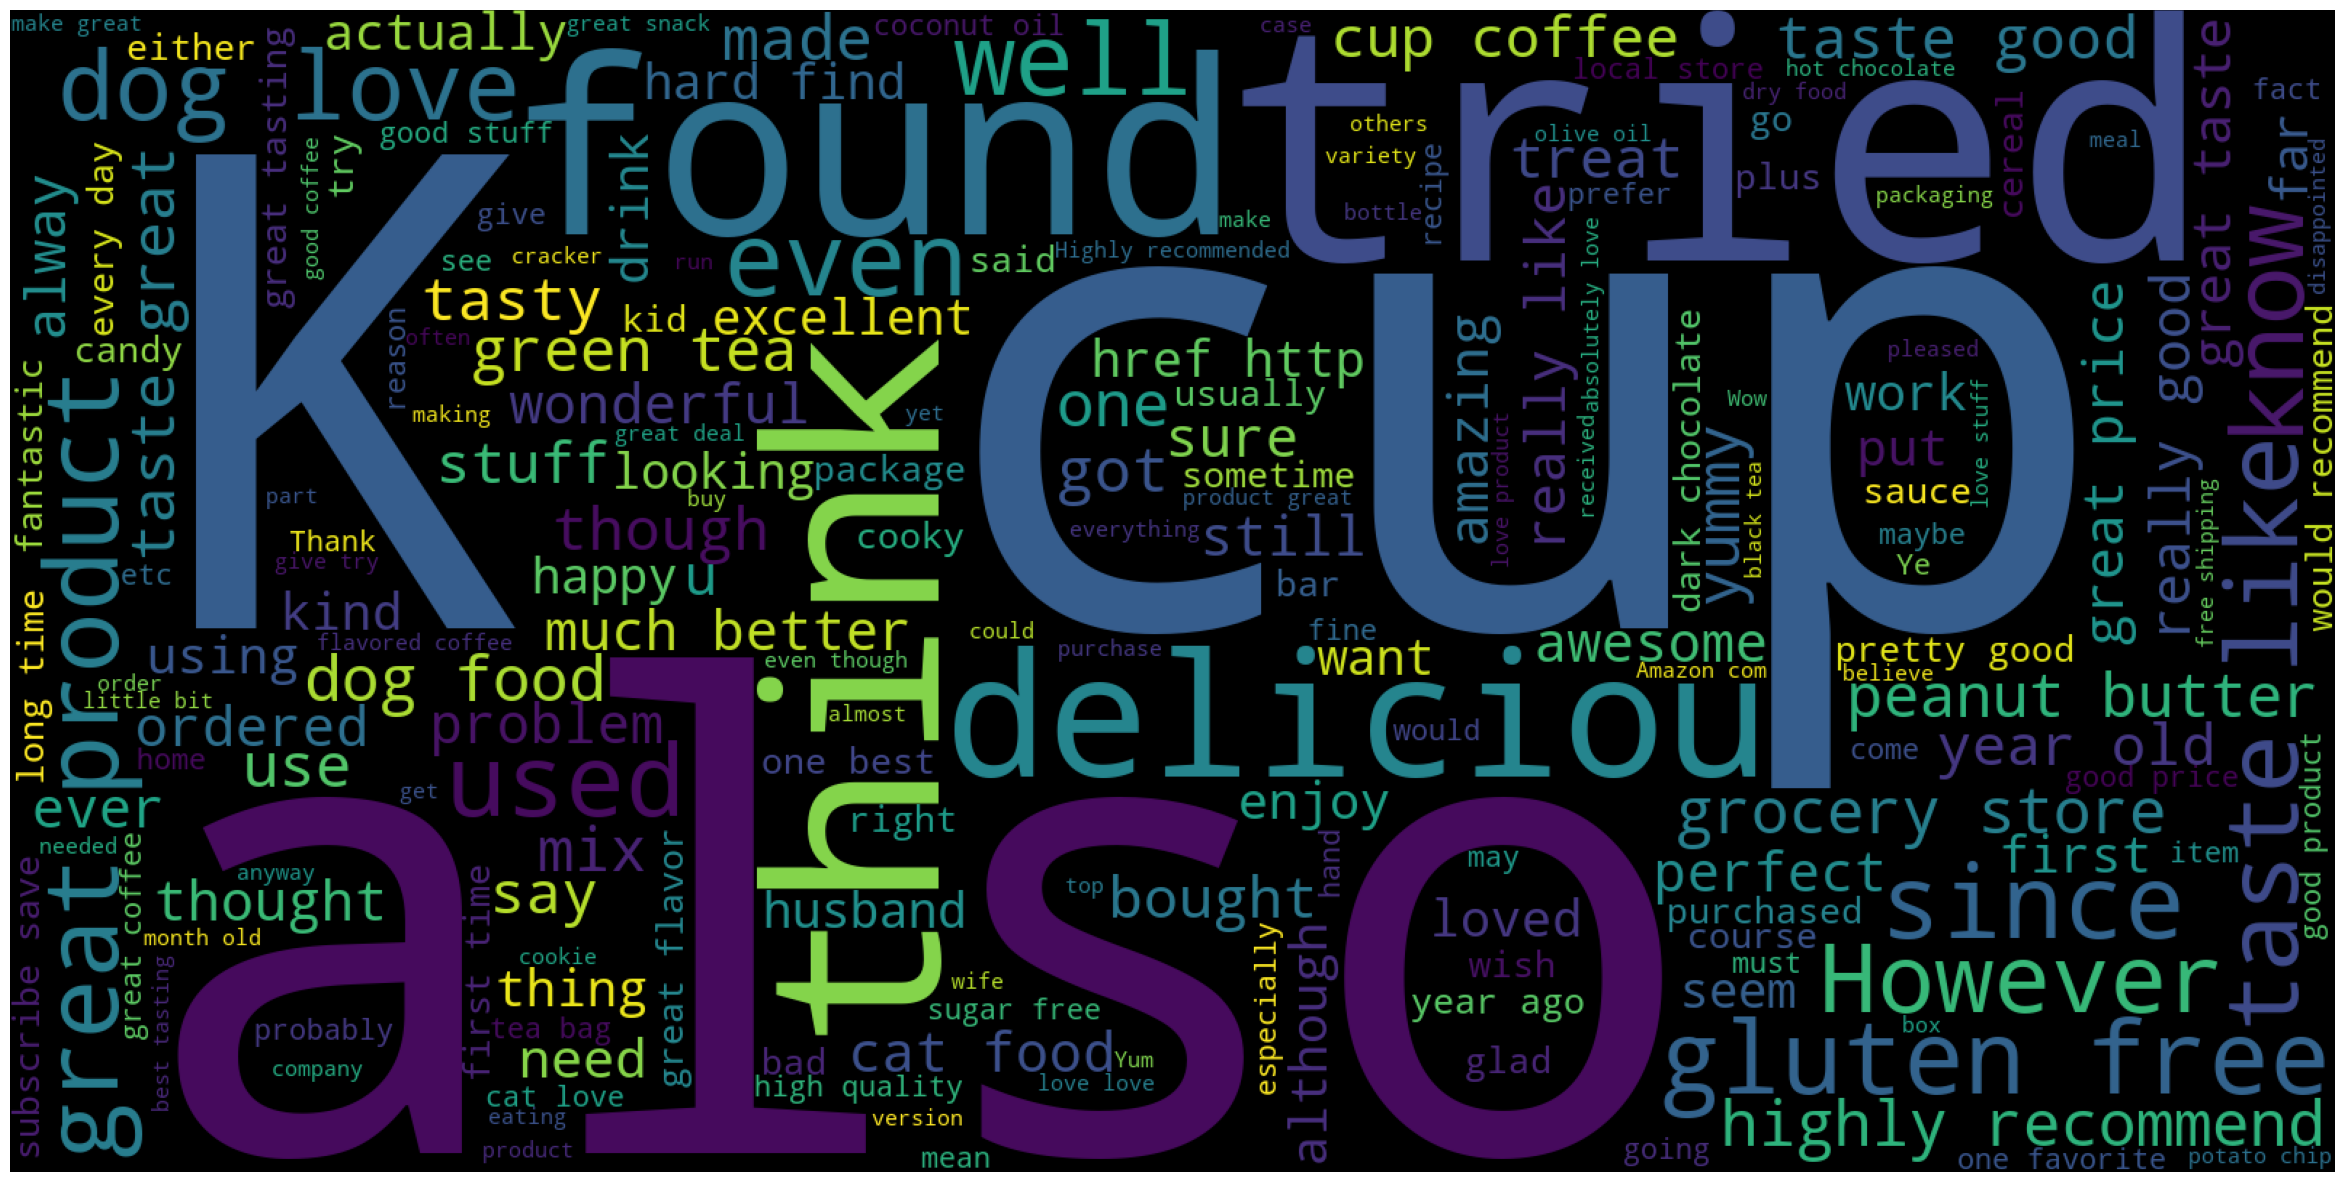

In [52]:
spam_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

plt.figure(1,figsize=(30,20))
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.show()

In [53]:
y_train

sentiment
229663   postive
131372   postive
205815  negative
398751   postive
376247    neural
...          ...
359783   postive
152315   postive
117952   postive
435829   postive
305711  negative

[426340 rows x 1 columns]

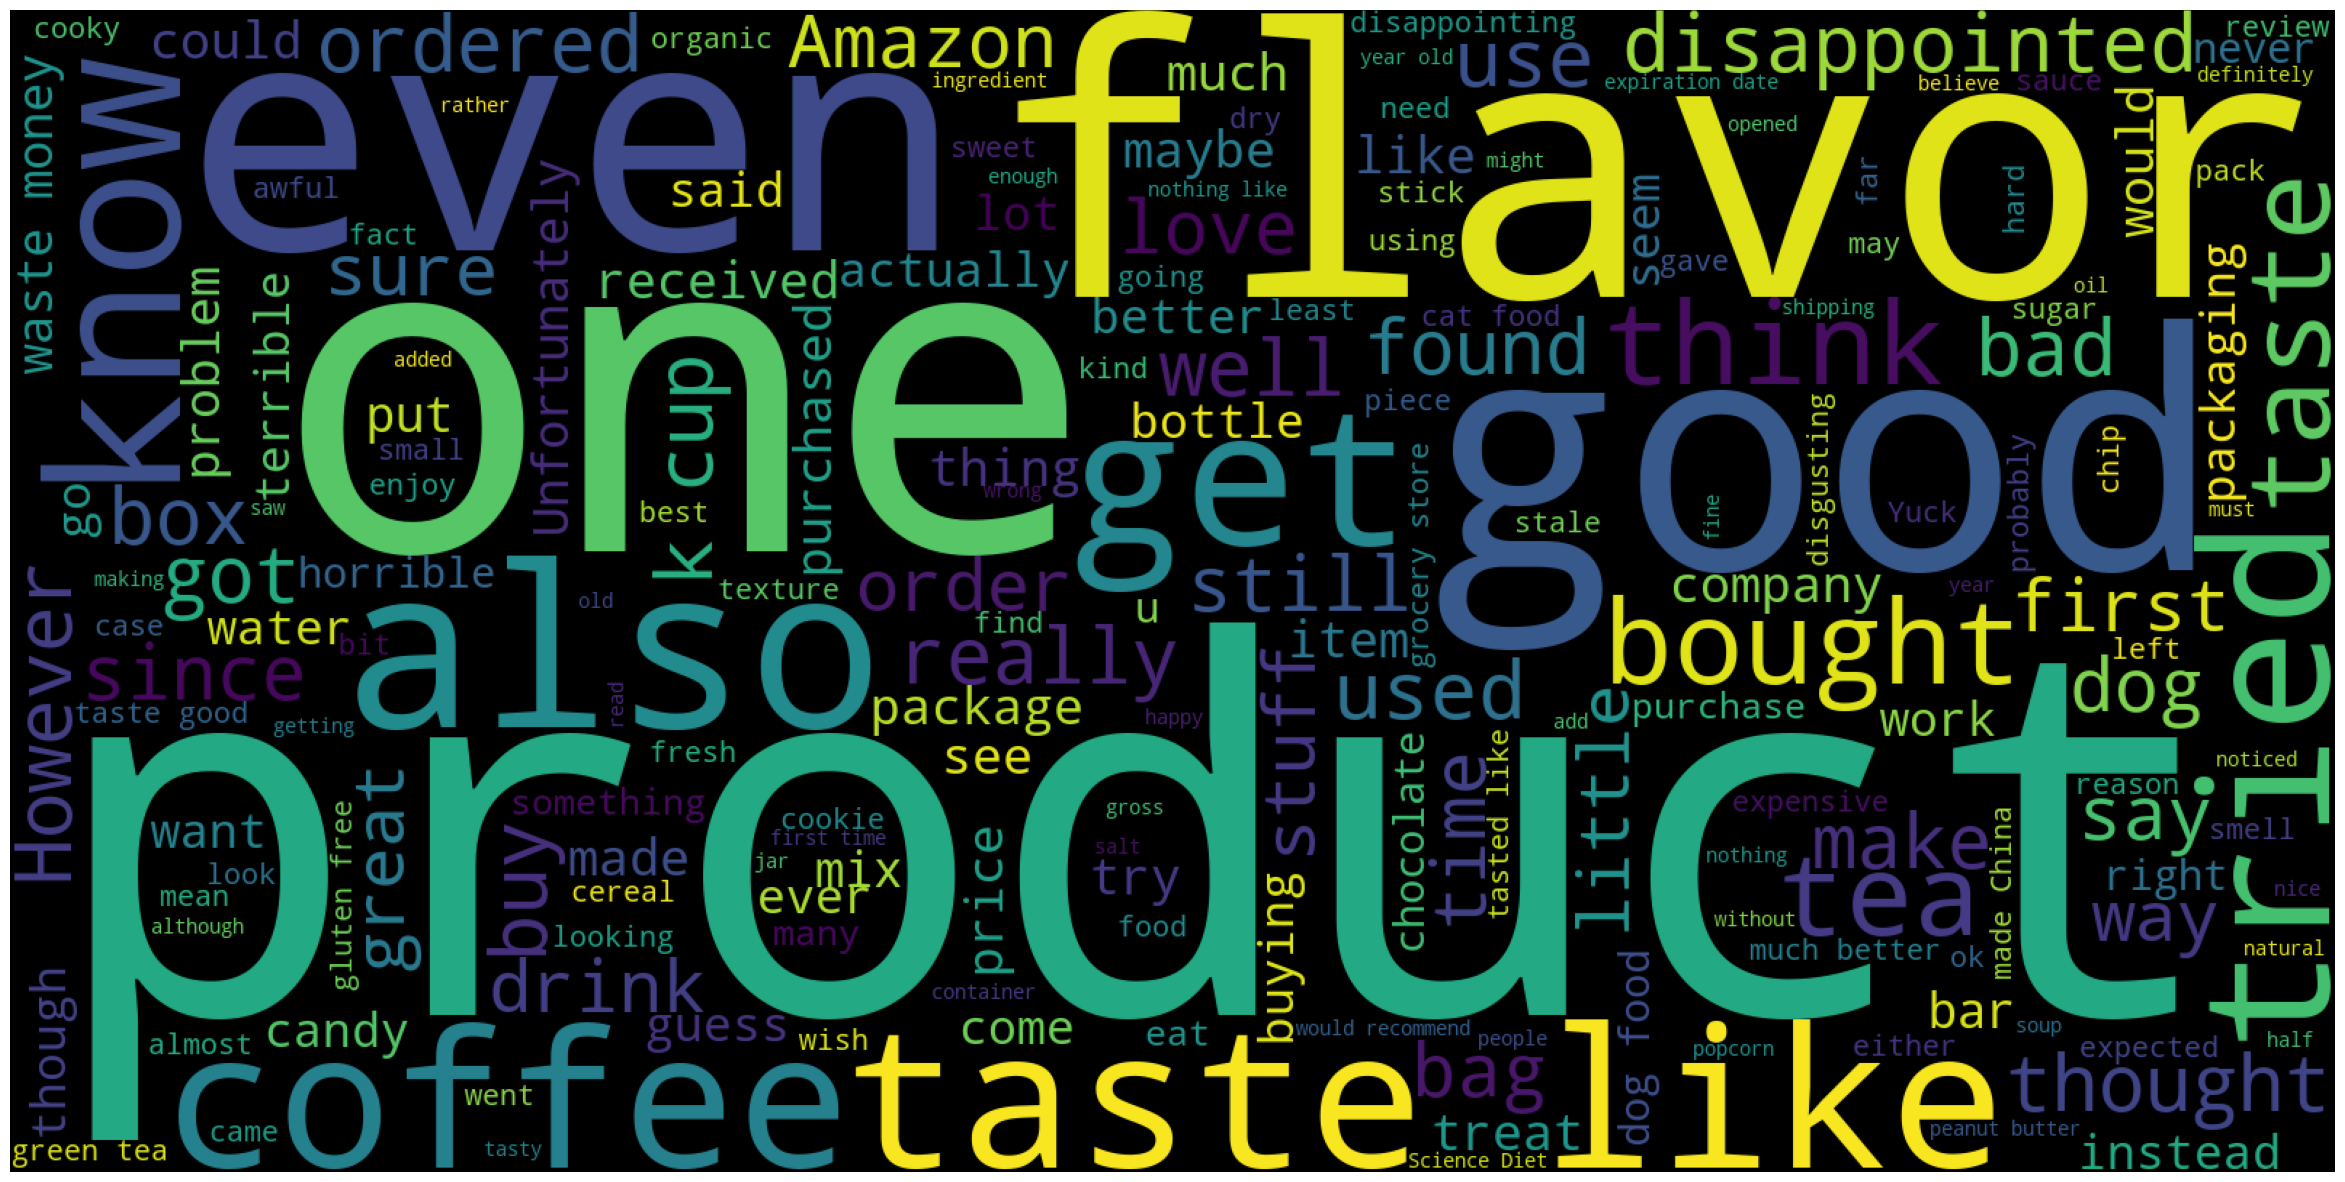

In [54]:
positive_df = X_train.loc[y_train["sentiment"]=='negative', :]

words = ' '.join(positive_df['clean_text'])

cleaned_word = " ".join([word for word in words.split()
                        if 'br' not in word])

spam_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

plt.figure(1,figsize=(30,20))
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.show()

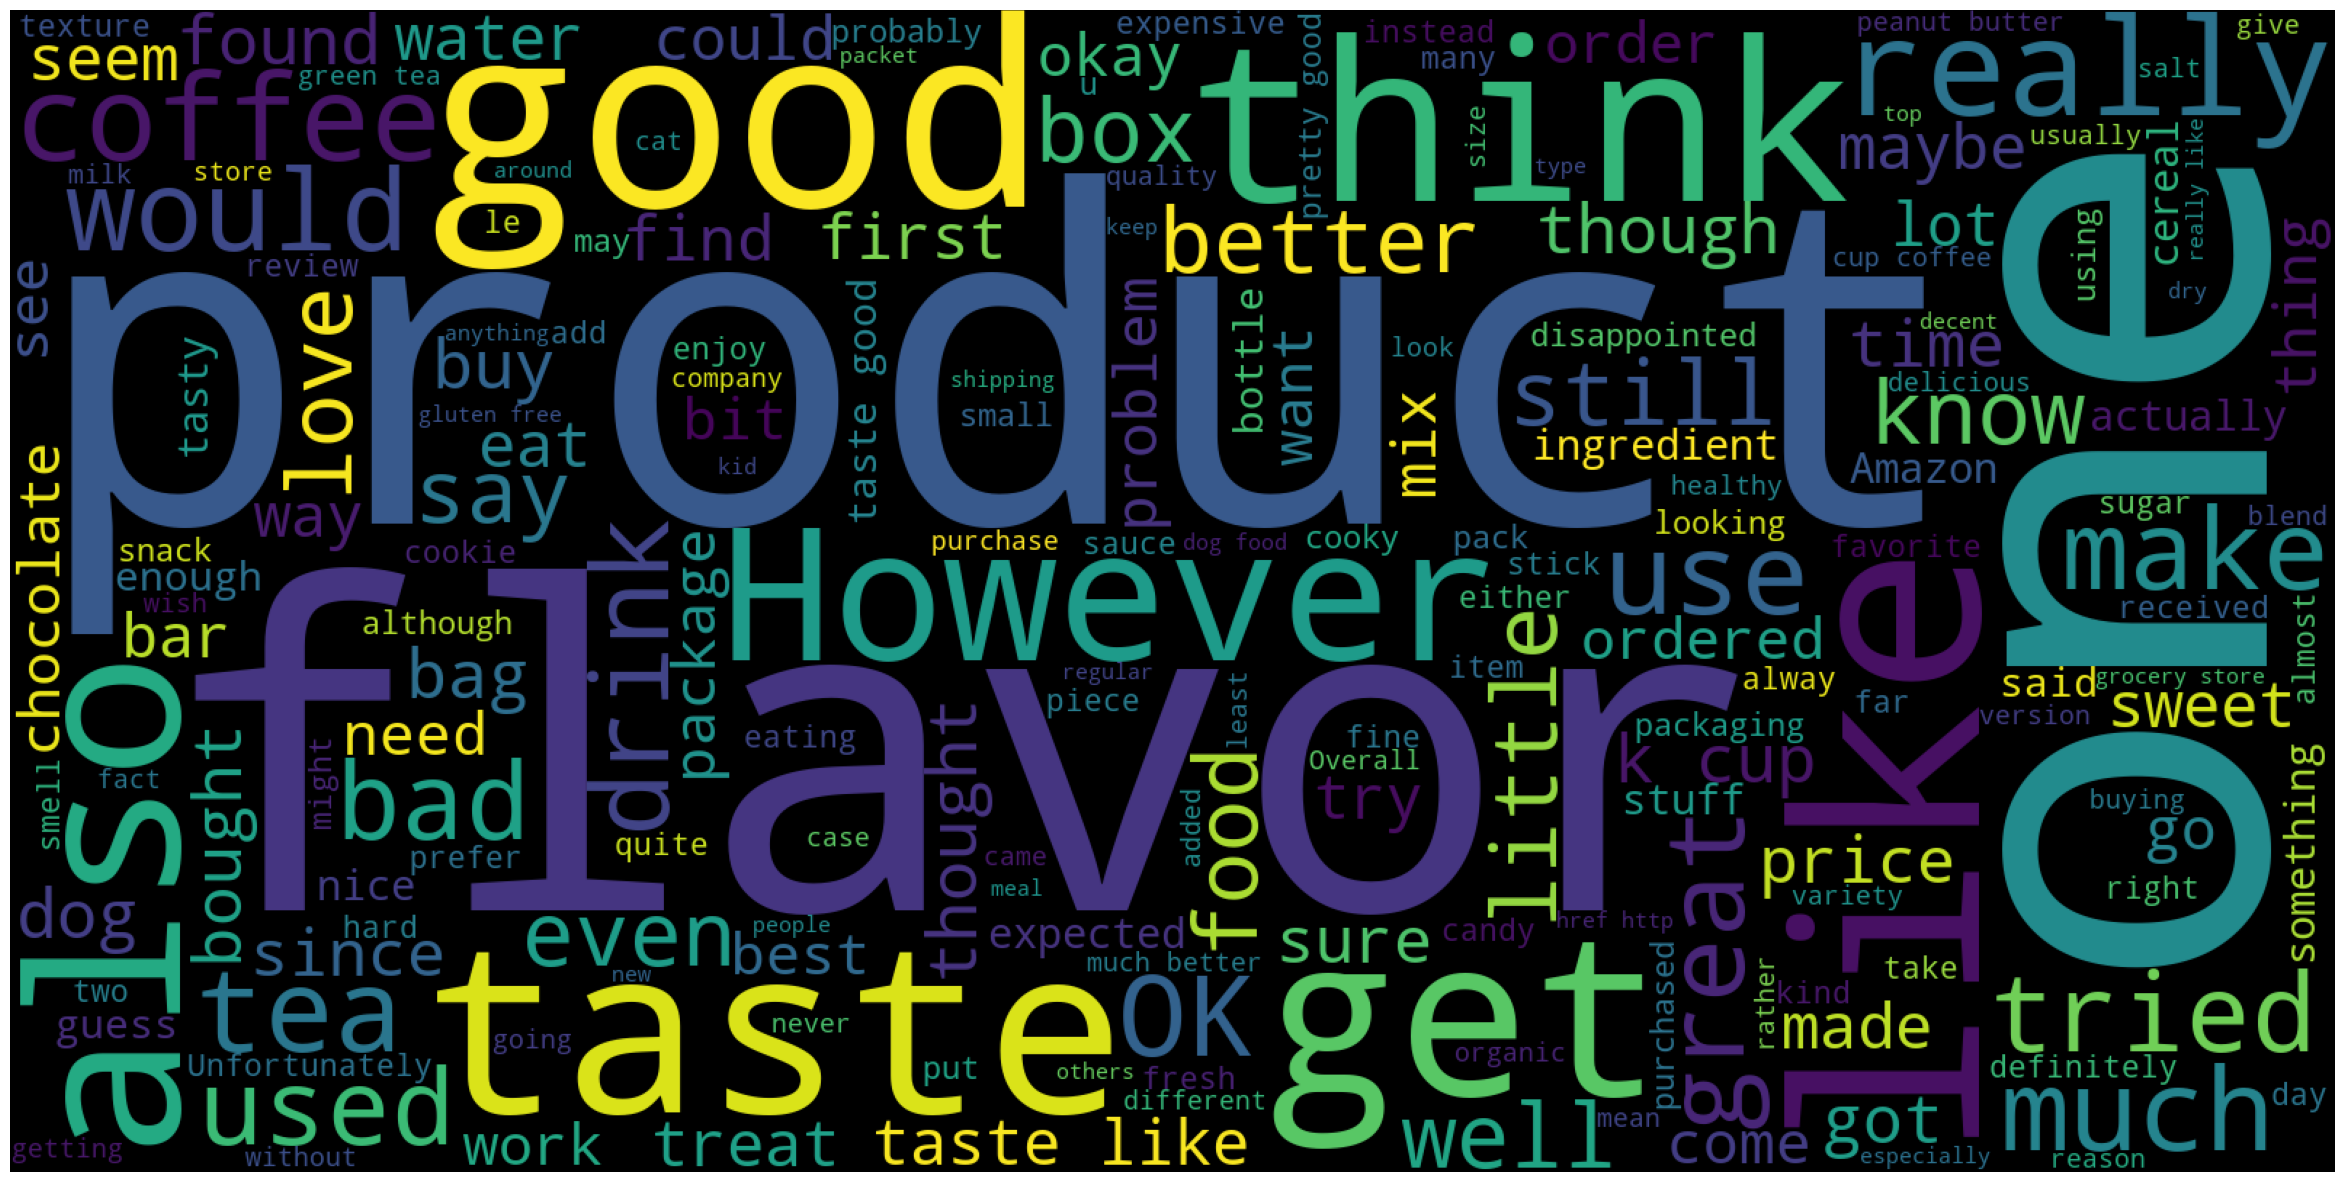

In [55]:
positive_df = X_train.loc[y_train["sentiment"]=='neural', :]

words = ' '.join(positive_df['clean_text'])

cleaned_word = " ".join([word for word in words.split()
                        if 'br' not in word])

spam_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

plt.figure(1,figsize=(30,20))
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.show()

# Data Prepration - Text Preprocessing

In [56]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [57]:
X_train.head()

0  \
229663   Medicine tablets and cats never ever mix. The...   
131372   Great stuff to have in the kitchen.<br />Good...   
205815   The shipping cost for these Necco Candy wafer...   
398751   This arrived in a timely manner and is a grea...   
376247   My dog was put on a hypoallergenic (duck and ...   

                                               clean_text  text_length  
229663  Medicine tablet cat never ever mix. The vet ma...           98  
131372  Great stuff kitchen. br Good delivery. Would b...           12  
205815  The shipping cost Necco Candy wafer . almost c...           14  
398751  This arrived timely manner great product. Love...           16  
376247  My dog put hypoallergenic duck potato dog food...           69

In [58]:
X_test.head()

0  \
11214    Check the ones who have listed five stars for...   
222079   Tasters Choice is the best instant coffee eve...   
251082   the only thing bothered me a bit is the packi...   
317731   One of the most disgusting experiences of my ...   
404652   I ordered the PureVia all Natural Zero Calori...   

                                               clean_text  text_length  
11214   Check one listed five star Dreamfields v grade...          186  
222079  Tasters Choice best instant coffee ever. I wan...           44  
251082  thing bothered bit packing. Some honey leaked ...           31  
317731  One disgusting experience life Pulled package ...           75  
404652  I ordered PureVia Natural Zero Calorie Sweeten...           27

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
vocab=CountVectorizer()
X_train_transform=vocab.fit_transform(X_train['clean_text'])


In [60]:
print("Total unique words:", len(vocab.vocabulary_))

print("Type of train features:", type(X_train_transform))

print("Shape of input data:", X_train_transform.shape)

Total unique words: 91675
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (426340, 91675)


In [61]:
from sys import getsizeof

print(type(X_train_transform))
print(getsizeof(X_train_transform), "Bytes")

<class 'scipy.sparse._csr.csr_matrix'>
56 Bytes


   - Total Unique Words: Identified 91,675 unique words in the dataset, indicating a diverse vocabulary across reviews.

 -   Type of Train Features: Represented as a sparse matrix of type 'scipy.sparse._csr.csr_matrix', efficiently storing large matrices with mostly zero values.

-    Shape of Input Data: Input data shape is (426,340, 91,675), comprising 426,340 reviews and 91,675 unique words.

In [62]:
X_train.to_csv("X_train.csv",index=False)

In [63]:
X_test.to_csv("X_test.csv",index=False)

In [64]:
X_test_transform = vocab.transform(X_test['clean_text'])


# Creating an Function to get traing and testing score

 -  Model Evaluation Metrics: Calculates accuracy, precision, and recall for training and testing data predictions.

  -  Model Name: Takes the model name as input for identification.

  -  Accuracy Score: Computes how often the model's predictions are correct.

  -  Precision Score: Measures the accuracy of positive predictions.

  -  Recall Score: Calculates the proportion of actual positive cases correctly identified by the model.


In [129]:
def evaluation_matric_train(y_train, y_train_pred, model_name, existing_df=None):
    metrics = {
        "Model": model_name,
        "Accuracy": accuracy_score(y_train, y_train_pred),
        "Precision": precision_score(y_train, y_train_pred, average='macro'),
        "Recall": recall_score(y_train, y_train_pred, average='macro')
    }

    new_row = pd.DataFrame([metrics])

    if existing_df is None:
        return new_row
    else:
        if model_name in existing_df['Model'].values:
            existing_df.loc[existing_df['Model'] == model_name] = new_row.values
            return existing_df
        else:
            return existing_df.append(new_row, ignore_index=True)


In [73]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score

def evaluation_matric_test(y_test, y_test_pred, model_name, existing_df=None):
    metrics = {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred, average='macro'),
        "Recall": recall_score(y_test, y_test_pred, average='macro')
    }

    new_row = pd.DataFrame([metrics])

    if existing_df is None:
        return new_row
    else:
        if model_name in existing_df['Model'].values:
            existing_df.loc[existing_df['Model'] == model_name] = new_row.values
            return existing_df
        else:
            return existing_df.append(new_row, ignore_index=True)


# Logistic Regression

In [80]:
%%time
log_reg = LogisticRegression(C=0.01, penalty='l2',solver='liblinear');

log_reg.fit(X_train_transform,y_train)

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: total: 1min 36s
Wall time: 55.9 s


LogisticRegression(C=0.01, solver='liblinear')

In [86]:
# evaluation matrix for y_train
%time 
y_train_pred_lr=log_reg.predict(X_train_transform)


CPU times: total: 0 ns
Wall time: 0 ns


In [130]:

evaluation_matric_train_lr=evaluation_matric_train(y_train, y_train_pred_lr, 'Logistic Regression')


In [131]:
# Train Metrics
evaluation_matric_train_lr

Model  Accuracy  Precision   Recall
0  Logistic Regression  0.879157   0.773497  0.61862

In [89]:
%time
y_test_pred_lr=log_reg.predict(X_test_transform)

CPU times: total: 0 ns
Wall time: 0 ns


In [126]:
evaluation_matric_test_lr=evaluation_matric_test(y_test, y_test_pred_lr, 'Logistic Regression')
evaluation_matric_test_lr

Model  Accuracy  Precision    Recall
0  Logistic Regression  0.874277   0.756241  0.607092

In [91]:
cm=confusion_matrix(y_test,y_test_pred_lr)
cm

array([[ 13713,    544,   6130],
       [  2346,   1808,   6490],
       [  1698,    659, 108726]], dtype=int64)

In [102]:
cm=confusion_matrix(y_test,y_test_pred_lr)
actual = np.sum(cm, axis=1).reshape(-1, 1)

cmn = np.round(cm/actual, 2)

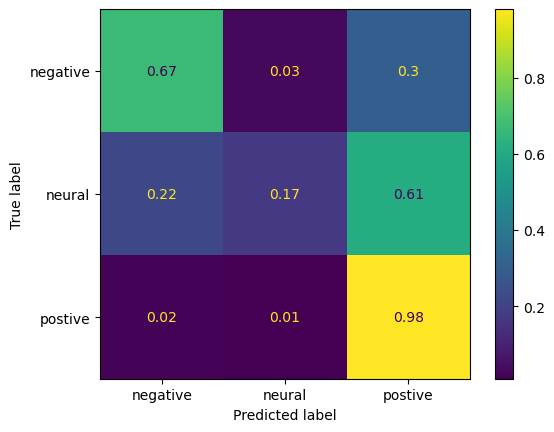

In [104]:
fig = metrics.ConfusionMatrixDisplay(cmn, display_labels=classifier.classes_)

fig.plot()
plt.show()


In [106]:
import joblib
import os

   ## Logistic Regression Insites
   Training Evaluation:

    Model: Logistic Regression
    Accuracy: 87.92%
    Precision: 77.35%
    Recall: 61.86%

Testing Evaluation:

    Model: Logistic Regression
    Accuracy: 87.43%
    Precision: 75.62%
    Recall: 60.71%

   **Consistent Performance:** The logistic regression model demonstrates consistency in performance between training and testing datasets, with similar accuracy, precision, and recall scores.

   **Generalization:** The model shows good generalization from training to testing, as evidenced by comparable performance metrics on unseen data.

   **Slight Decrease in Precision and Recall:** There is a minor decrease in precision and recall from training to testing, indicating a slight drop in predictive accuracy on unseen data. This could be attributed to the model's ability to generalize but may require further investigation to address.

   **Robustness:** Despite the slight decrease, the model maintains robust performance on the testing dataset, suggesting its effectiveness in making predictions on new, unseen instances.

  **Room for Improvement:** While the model performs well overall, there may be opportunities to fine-tune it further to enhance precision and recall, potentially improving its predictive capabilities on unseen data even more.

In [108]:
# Serialization


joblib.dump(log_reg, 'log_model.pkl')

['log_model.pkl']

# Multinomial Naive Bayes

In [109]:
%%time

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

classifier = MultinomialNB()
classifier.fit(X_train_transform, y_train)

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: total: 2.23 s
Wall time: 2.33 s


MultinomialNB()

In [110]:
# evaluation matrix for y_train
%time 
y_train_pred_nb=classifier.predict(X_train_transform)

CPU times: total: 0 ns
Wall time: 0 ns


In [ ]:
%time
y_test_pred_nb = classifier.predict()

In [133]:
evaluation_matric_train_nb=evaluation_matric_train(y_train, y_train_pred_nb,'Naive Bayes')
evaluation_matric_train_nb

Model  Accuracy  Precision    Recall
0  Naive Bayes  0.859828   0.689512  0.708013

In [137]:
evaluation_matric_test_nb=evaluation_matric_test(y_test, y_test_pred,'Naive Bayes')
evaluation_matric_test_nb

Model  Accuracy  Precision    Recall
0  Naive Bayes  0.860197   0.695819  0.613311

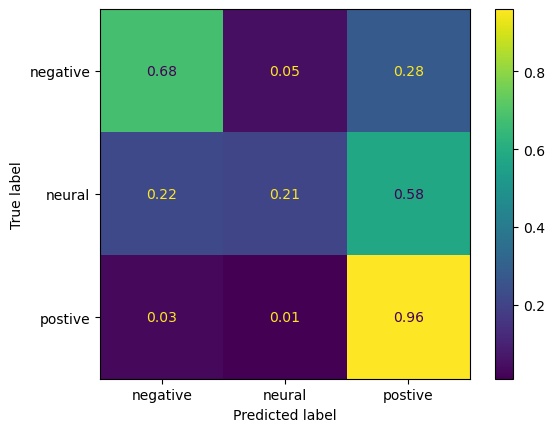

In [135]:
cm = metrics.confusion_matrix(y_test, y_test_pred, labels=classifier.classes_)

cmn = np.round(cm/actual, 2)

fig = metrics.ConfusionMatrixDisplay(cmn, display_labels=classifier.classes_)

fig.plot()


# Multinomial Naive Bayes Insites

Training Evaluation:

    Model: Naive Bayes
    Accuracy: 85.98%
    Precision: 68.95%
    Recall: 70.80%

Testing Evaluation:

    Model: Naive Bayes
    Accuracy: 86.02%
    Precision: 69.58%
    Recall: 61.33%


**Consistent Performance:** The Naive Bayes model demonstrates consistent performance between training and testing datasets, with similar accuracy, precision, and recall scores.

**Generalization:** The model shows good generalization from training to testing, as evidenced by comparable performance metrics on unseen data.

**Robustness:** The model maintains robust performance on the testing dataset, suggesting its effectiveness in making predictions on new, unseen instances.

**Precision and Recall Trade-off:** There may be a trade-off between precision and recall, as indicated by the difference in scores between training and testing. While precision increases slightly, recall decreases slightly on the testing dataset compared to training.

In [140]:
joblib.dump(classifier, 'multinomial_nb.pkl')

['multinomial_nb.pkl']

Based on the information provided, let's compare logistic regression and multinomial Naive Bayes:

    Performance:
        Logistic Regression Training Accuracy: 87.92%
        Logistic Regression Testing Accuracy: 87.43%
        Multinomial Naive Bayes Training Accuracy: 85.98%
        Multinomial Naive Bayes Testing Accuracy: 86.02%

    Both models have comparable performance in terms of accuracy, with logistic regression slightly outperforming multinomial Naive Bayes on both training and testing datasets.

    

### Selecting Logistic Regression:

        Higher accuracy, precision, and recall scores compared to Multinomial Naive Bayes.
        Offers direct interpretability of coefficients, aiding in understanding the impact of features on the outcome.
        Better handles complex relationships between features and the target variable.
### Why?:
        Logistic Regression demonstrates superior performance and interpretability, making it a more suitable choice for the classification task at hand.